## Observations and Insights

## Dependencies and starter code

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [2]:
# mouse_metadata.head()

In [3]:
# study_results.head()

In [4]:
merged_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen

summary = merged_df[["Drug Regimen", "Tumor Volume (mm3)"]]
summary = summary.groupby("Drug Regimen")

summ_count = summary["Tumor Volume (mm3)"].count()
summ_mean = summary["Tumor Volume (mm3)"].mean()
summ_median = summary["Tumor Volume (mm3)"].median()
summ_var = summary["Tumor Volume (mm3)"].var()
summ_std = summary["Tumor Volume (mm3)"].std()
summ_sem = summary["Tumor Volume (mm3)"].sem()

summary = {
    "count": summ_count,
    "mean": summ_mean,
    "median": summ_median,
    "var": summ_var,
    "std": summ_std,
    "sem": summ_sem
}

summary = pd.DataFrame.from_dict(summary)
summary.reset_index(inplace=True)
summary

,Drug Regimen,count,mean,median,var,std,sem
0,Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,182,53.236507,51.818479,48.533355,6.966589,0.516398


In [6]:
## Bar plots

Text(0, 0.5, 'Count')

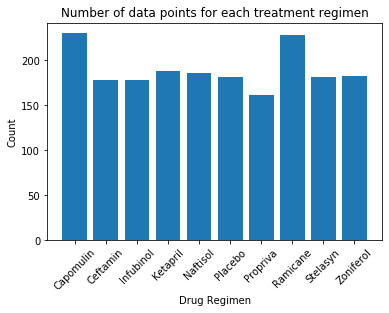

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

regimen = summary.iloc[:,0]
count = summary.iloc[:,1]

plt.bar(x=regimen, height=count)
plt.xticks(regimen, rotation=45)
plt.title('Number of data points for each treatment regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')

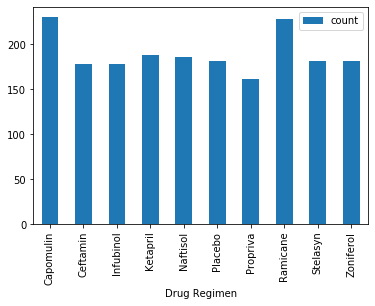

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

summary.plot(x= "Drug Regimen", y="count", kind="bar")

## Pie plots

In [9]:
sex_count = merged_df["Sex"].value_counts()
sex_count = pd.DataFrame(sex_count)
sex_count

,Sex
Male,958
Female,935


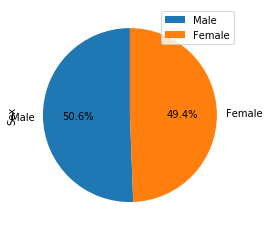

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count.plot.pie(y="Sex", autopct='%1.1f%%', startangle=90)

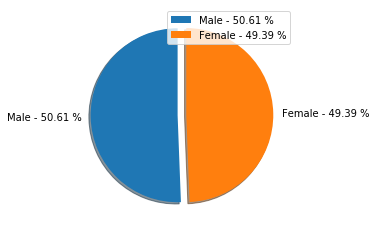

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
names = ["Male", "Female"]
sizes = sex_count["Sex"]
explode = (0.1, 0)
porcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(names, porcent)]

plt.pie(sizes, labels=labels, startangle=90, explode=explode, shadow=True)
plt.legend(labels, loc="upper right")
plt.show()

## Quartiles, outliers and boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment 
# regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#final_tv = merged_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
#final_tv_loc = final_tv[final_tv['Drug Regimen'].isin(['Ramicane', 'Capomulin', "Infubinol", "Ceftamin"])]


final_tv = merged_df.groupby(['Drug Regimen', 'Mouse ID'])
final_tv = final_tv["Tumor Volume (mm3)"].last()
final_tv_loc = pd.DataFrame({'Final Tumor Volume (mm3)': final_tv})
final_tv_loc.reset_index()

,Drug Regimen,Mouse ID,Final Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
5,Capomulin,i557,47.685963
6,Capomulin,i738,37.311846
7,Capomulin,j119,38.125164
8,Capomulin,j246,38.753265
9,Capomulin,l509,41.483008


In [13]:
#separating every treatment from the df

ftv_ramicane = final_tv_loc.loc['Ramicane']
ftv_capomulin = final_tv_loc.loc['Capomulin']
ftv_infubinol = final_tv_loc.loc['Infubinol']
ftv_ceftamin = final_tv_loc.loc['Ceftamin']

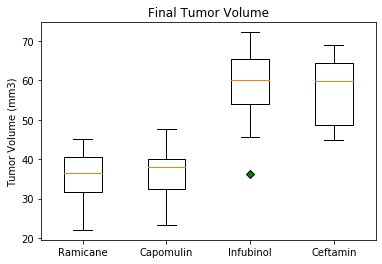

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ax = plt.subplots()
ax.set_title("Final Tumor Volume")
ax.set_ylabel("Tumor Volume (mm3)")
outliers = dict(markerfacecolor='g', marker='D')
ax.boxplot([ftv_ramicane["Final Tumor Volume (mm3)"], 
             ftv_capomulin["Final Tumor Volume (mm3)"], 
             ftv_infubinol["Final Tumor Volume (mm3)"],
             ftv_ceftamin["Final Tumor Volume (mm3)"]], flierprops=outliers)

labels = ("Ramicane", "Capomulin", "Infubinol", "Ceftamin")
positions = (1, 2, 3, 4)
plt.xticks(positions, labels)
plt.show()

## Line and scatter plots

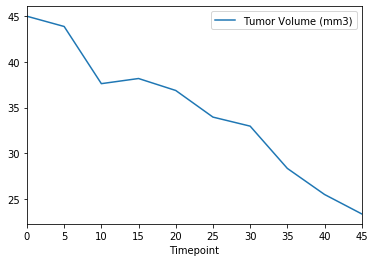

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

tp_tv = merged_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
tp_tv = tp_tv[tp_tv["Drug Regimen"] == "Capomulin"]
tp_tv = tp_tv[tp_tv["Mouse ID"] == "s185"]

tp_tv.plot(x="Timepoint", y="Tumor Volume (mm3)", kind="line")
plt.show()

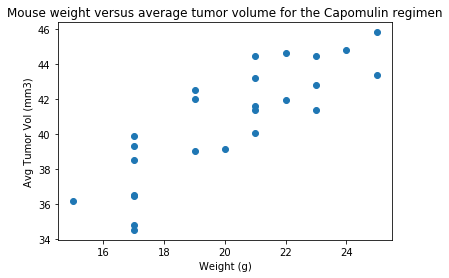

In [36]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

final_tv_avg = merged_df.groupby(['Drug Regimen', 'Mouse ID'])
tv_avg = final_tv_avg["Tumor Volume (mm3)"].mean()
mouse_weight = final_tv_avg["Weight (g)"].first()

tv_avg = pd.DataFrame({"Avg Tumor Vol": tv_avg,
                      "Weight (g)": mouse_weight})
tv_avg.reset_index()

capomulin_tv_weight = tv_avg.loc["Capomulin"]
weight = capomulin_tv_weight["Weight (g)"]
avg_vol = capomulin_tv_weight["Avg Tumor Vol"]

plt.scatter(weight, avg_vol)
plt.title("Mouse weight versus average tumor volume for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Vol (mm3)")
plt.show()

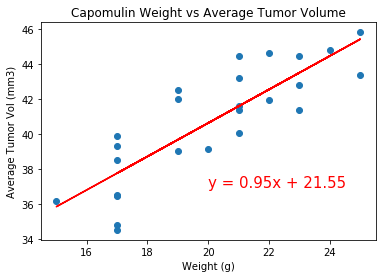

In [47]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average 
# tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, avg_vol)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20, 37),fontsize=15,color="red")
plt.title("Capomulin Weight vs Average Tumor Volume")
plt.ylabel('Average Tumor Vol (mm3)')
plt.xlabel('Weight (g)')
plt.show()